## Charts

In [1]:
import math
import bokeh.plotting
import numpy as np


e = math.exp(1)
x = np.arange(1, 200)
y = (1 + 1/x) ** x

chart = bokeh.plotting.figure(title="Euler's Number", sizing_mode="stretch_width")
chart.line(x, y, line_width=2, color="blue")
chart.line(x, e, line_width=2, color="red")
chart.xaxis.axis_label = "x"
chart.yaxis.axis_label = "y"

bokeh.plotting.show(chart)

In [2]:
type(chart)

bokeh.plotting.figure.Figure

## Price chart

In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web


def get_pricing_data(
    ticker: str,
    start: datetime.date,
    end: datetime.date
) -> pd.DataFrame:
    """ Returns a pandas dataframe of prices. """
    return web.DataReader(ticker, "yahoo", start, end)


In [3]:
start = datetime(2010, 1, 1).date()
end = datetime.now().date()
df = web.DataReader("MSFT", "yahoo", start, end)

In [4]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.99,30.480000,30.980000,30.480000,31929700.0,23.858992
2010-01-04,31.10,30.590000,30.620001,30.950001,38409100.0,24.226894
2010-01-05,31.10,30.639999,30.850000,30.959999,49749600.0,24.234720


In [5]:
import numpy as np

returns = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
returns[:5]

Date
2009-12-31         NaN
2010-01-04    0.015302
2010-01-05    0.000323
2010-01-06   -0.006156
2010-01-07   -0.010454
Name: Adj Close, dtype: float64

In [6]:
import math

math.log(24.226894 / 23.858992)

0.015302169075362766

In [7]:
df["Returns"] = returns

In [8]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2009-12-31,30.99,30.480000,30.980000,30.480000,31929700.0,23.858992,NaN
2010-01-04,31.10,30.590000,30.620001,30.950001,38409100.0,24.226894,0.015302
2010-01-05,31.10,30.639999,30.850000,30.959999,49749600.0,24.234720,0.000323


In [9]:
returns[1:3]

Date
2010-01-04    0.015302
2010-01-05    0.000323
Name: Adj Close, dtype: float64

In [10]:
#  https://docs.bokeh.org/en/latest/docs/gallery/histogram.html?highlight=histogram
import numpy as np
from bokeh.plotting import figure, show


def make_plot(title, hist, edges, x, pdf):
    p = figure(title=title, tools="", background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = "x"
    p.yaxis.axis_label = "Pr(x)"
    p.grid.grid_line_color="white"
    return p


nona_returns = returns[~np.isnan(returns)]
hist, edges = np.histogram(nona_returns[1:], density=True, bins=50)
mu = np.mean(nona_returns)
sigma = np.std(nona_returns)
x = np.linspace(-0.05, 0.05, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))

title = "Returns Distribution (μ=%0.2f%%, σ=%0.2f%%)" % (round(mu * 100, 2), round(sigma * 100, 2))
p = make_plot(title, hist, edges, x, pdf)


In [20]:
show(p)

In [11]:
d = returns.describe()
d

count    2629.000000
mean        0.000785
std         0.015831
min        -0.159453
25%        -0.006768
50%         0.000680
75%         0.008435
max         0.132929
Name: Adj Close, dtype: float64

In [12]:
type(d)

pandas.core.series.Series

## Box and whisker
Let's change over to mpl for now...

{'whiskers': [<matplotlib.lines.Line2D at 0x253ec4bc7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x253ec4bce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x253ec4bc668>],
 'medians': [<matplotlib.lines.Line2D at 0x253ec4d5518>],
 'fliers': [<matplotlib.lines.Line2D at 0x253ec4d5860>],
 'means': []}

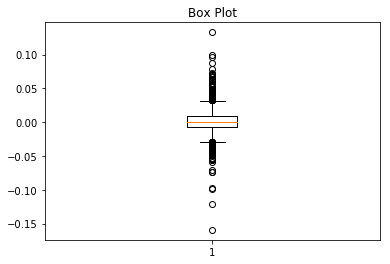

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title("Box Plot")
ax.boxplot(nona_returns)


In [14]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2009-12-31,30.99,30.480000,30.980000,30.480000,31929700.0,23.858992,NaN
2010-01-04,31.10,30.590000,30.620001,30.950001,38409100.0,24.226894,0.015302
2010-01-05,31.10,30.639999,30.850000,30.959999,49749600.0,24.234720,0.000323


In [15]:
nona_returns

Date
2010-01-04    0.015302
2010-01-05    0.000323
2010-01-06   -0.006156
2010-01-07   -0.010454
2010-01-08    0.006873
                ...   
2020-06-08    0.006177
2020-06-09    0.007616
2020-06-10    0.036420
2020-06-11   -0.055194
2020-06-12    0.007861
Name: Adj Close, Length: 2629, dtype: float64

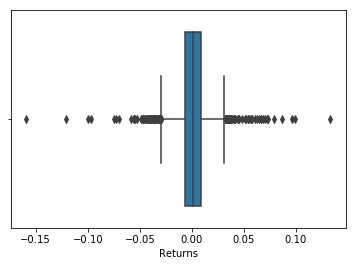

In [16]:
import seaborn as sns

nona_returns.rename("Returns", inplace=True)
ax = sns.boxplot(x=nona_returns)

In [17]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2009-12-31,30.99,30.480000,30.980000,30.480000,31929700.0,23.858992,NaN
2010-01-04,31.10,30.590000,30.620001,30.950001,38409100.0,24.226894,0.015302
2010-01-05,31.10,30.639999,30.850000,30.959999,49749600.0,24.234720,0.000323


In [18]:
df["Year"] = [trade_date.year for trade_date in df.index]
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Returns,Year
Date,,,,,,,,
2009-12-31,30.99,30.480000,30.980000,30.480000,31929700.0,23.858992,NaN,2009
2010-01-04,31.10,30.590000,30.620001,30.950001,38409100.0,24.226894,0.015302,2010
2010-01-05,31.10,30.639999,30.850000,30.959999,49749600.0,24.234720,0.000323,2010


In [19]:
import altair as alt
alt.renderers.enable('notebook')

c = alt.Chart(df[df.Year != 2009]).mark_boxplot().encode(
    x="Year",
    y="Returns",
)


## Volatility Clustering

In [20]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Year
Date,,,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.858992,NaN,2009
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.226894,0.015302,2010
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.234720,0.000323,2010
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.085989,-0.006156,2010
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.835503,-0.010454,2010


In [21]:
df["AbsReturn"] = df["Returns"].abs()
df["AbsReturnLag"] = df["AbsReturn"].shift(1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Year,AbsReturn,AbsReturnLag
Date,,,,,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.858992,NaN,2009,NaN,NaN
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.226894,0.015302,2010,0.015302,NaN
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.234720,0.000323,2010,0.000323,0.015302
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.085989,-0.006156,2010,0.006156,0.000323
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.835503,-0.010454,2010,0.010454,0.006156


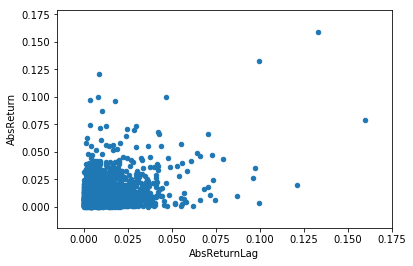

In [22]:
ax = df.plot.scatter(
    x="AbsReturnLag",
    y="AbsReturn",
)

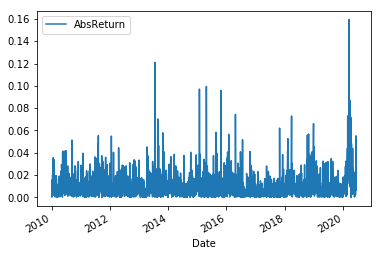

In [23]:
df["Date"] = df.index.values
df.plot.line(
    x="Date",
    y="AbsReturn"
)

In [38]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats("svg")


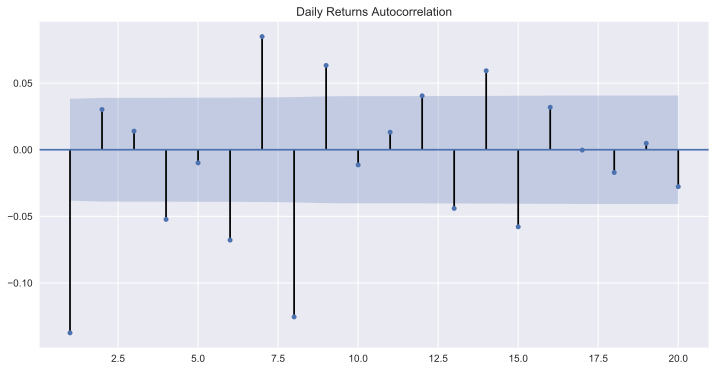

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

plt.style.use("seaborn")
fig, ax = plt.subplots(1)
plot_acf(
    nona_returns,
    ax=ax,
    lags=20,
    alpha=0.05,
    use_vlines=True,
    unbiased=False,
    fft=False,
    title="Daily Returns Autocorrelation",
    zero=False,
)

fig.set_size_inches(12, 6)

In [35]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

## Volume / Volatility Correlation

In [41]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,Returns,Year,AbsReturn,AbsReturnLag,Date
Date,,,,,,,,,,,
2009-12-31,30.99,30.48,30.980000,30.480000,31929700.0,23.858992,NaN,2009,NaN,NaN,2009-12-31
2010-01-04,31.10,30.59,30.620001,30.950001,38409100.0,24.226894,0.015302,2010,0.015302,NaN,2010-01-04


In [42]:
days = 30

In [60]:
df["AggReturns"] = np.log(df["Adj Close"] / df["Adj Close"].shift(days))

In [77]:
df["AggReturns"] = df["Returns"].rolling(days).sum()
df["AggVolume"] = df["Volume"].rolling(days).mean()

In [78]:
dft = df.tail(40)
dft

,High,Low,Open,Close,Volume,Adj Close,Returns,Year,AbsReturn,AbsReturnLag,Date,AggReturns,AggVolume
Date,,,,,,,,,,,,,
2020-03-04,170.699997,165.619995,168.490005,170.550003,49814400.0,170.076324,0.036057,2020,0.036057,0.049106,2020-03-04,0.446156,3.377047e+07
2020-03-10,161.029999,152.580002,158.160004,160.919998,65354400.0,160.473068,0.066147,2020,0.066147,0.070178,2020-03-10,0.501445,3.416637e+07
2020-03-13,161.910004,140.729996,147.500000,158.830002,92727400.0,158.388870,0.132929,2020,0.132929,0.099642,2020-03-13,0.634374,3.666668e+07
2020-03-17,147.500000,135.000000,140.000000,146.570007,81059800.0,146.162933,0.079122,2020,0.079122,0.159453,2020-03-17,0.705333,3.888465e+07
2020-03-19,150.149994,139.000000,142.770004,142.710007,85922700.0,142.313660,0.016319,2020,0.016319,0.043008,2020-03-19,0.719826,4.113498e+07
2020-03-24,149.600006,141.270004,143.750000,148.339996,82516700.0,147.928009,0.086999,2020,0.086999,0.010025,2020-03-24,0.806127,4.327322e+07
2020-03-26,156.660004,148.369995,148.399994,156.110001,64568100.0,155.676437,0.060673,2020,0.060673,0.009619,2020-03-26,0.848453,4.467142e+07
2020-03-30,160.600006,150.009995,152.440002,160.229996,63420300.0,159.784988,0.067977,2020,0.067977,0.041928,2020-03-30,0.913849,4.609164e+07
2020-04-02,155.479996,150.360001,151.860001,155.259995,49630700.0,154.828781,0.020497,2020,0.020497,0.036154,2020-04-02,0.918543,4.682112e+07


In [79]:
dft.Volume.values[-30:].mean()

38894153.333333336

In [80]:
dft.Returns.values[-30:].sum()

0.4206225659381467

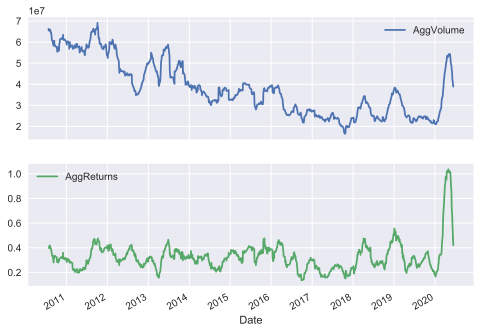

In [81]:
x =  df[["AggVolume", "AggReturns"]].plot.line(subplots=True)

In [75]:
type(x)

numpy.ndarray

In [76]:
type(x[0])

matplotlib.axes._subplots.AxesSubplot